In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_aprobaciones = pd.read_csv('../aprobaciones_limpias.csv')

In [15]:
df_aprob_pais = pd.DataFrame(df_aprobaciones.groupby('PAIS').sum('MONTO_BRUTO_USD')['MONTO_BRUTO_USD'])

In [18]:
df_aprob_pais = df_aprob_pais.sort_values('MONTO_BRUTO_USD',ascending=False)

In [23]:
top_5_aprob = df_aprob_pais.reset_index().head()
top_5_aprob['MONTO_BILLONES_USD'] = top_5_aprob['MONTO_BRUTO_USD'] / 1e9

In [26]:
top_5_aprob["MONTO_BILLONES_USD"] = top_5_aprob["MONTO_BILLONES_USD"].round(2)
top_5_aprob

,PAIS,MONTO_BRUTO_USD,MONTO_BILLONES_USD
0,Costa Rica,1.384132e+10,13.84
1,El Salvador,1.010890e+10,10.11
2,Honduras,9.237314e+09,9.24
3,Nicaragua,7.744200e+09,7.74
4,Guatemala,7.331794e+09,7.33


In [27]:
top_5_aprob = top_5_aprob.drop(columns=["MONTO_BRUTO_USD"])
top_5_aprob

,PAIS,MONTO_BILLONES_USD
0,Costa Rica,13.84
1,El Salvador,10.11
2,Honduras,9.24
3,Nicaragua,7.74
4,Guatemala,7.33


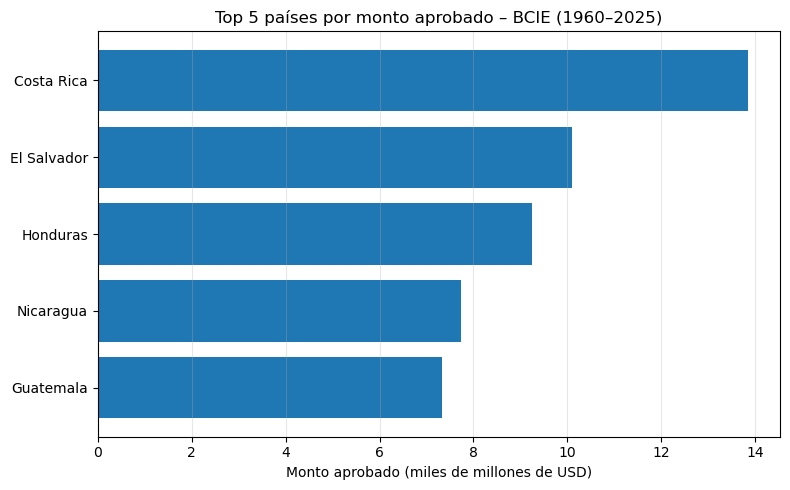

In [28]:
plt.figure(figsize=(8,5))

plt.barh(
    top_5_aprob["PAIS"],
    top_5_aprob["MONTO_BILLONES_USD"]
)

plt.xlabel("Monto aprobado (miles de millones de USD)")
plt.title("Top 5 países por monto aprobado – BCIE (1960–2025)")
plt.gca().invert_yaxis()  # país con mayor monto arriba
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.savefig(
    "Graficos/04_top_5_paises_aprobados.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [29]:
df_desembolsos = pd.read_csv('../desembolsos_limpios.csv')

In [31]:
df_desem_pais = pd.DataFrame(df_desembolsos.groupby('PAIS').sum('MONTO_BRUTO_USD')['MONTO_BRUTO_USD'])

In [42]:
top_5_desem = df_desem_pais.sort_values('MONTO_BRUTO_USD', ascending= False).head()
top_5_desem

,PAIS,MONTO_BRUTO_USD
3,Costa Rica,1.010291e+10
5,El Salvador,9.413078e+09
6,Guatemala,6.009661e+09
7,Honduras,5.995158e+09
9,Nicaragua,5.982712e+09


In [43]:
top_5_desem = top_5_desem.reset_index()
top_5_desem

,index,PAIS,MONTO_BRUTO_USD
0,3,Costa Rica,1.010291e+10
1,5,El Salvador,9.413078e+09
2,6,Guatemala,6.009661e+09
3,7,Honduras,5.995158e+09
4,9,Nicaragua,5.982712e+09


In [45]:
top_5_desem['MONTO_BILLONES_USD'] = top_5_desem['MONTO_BRUTO_USD'] / 1e9
top_5_desem

,index,PAIS,MONTO_BRUTO_USD,MONTO_BILLONES_USD
0,3,Costa Rica,1.010291e+10,10.102911
1,5,El Salvador,9.413078e+09,9.413078
2,6,Guatemala,6.009661e+09,6.009661
3,7,Honduras,5.995158e+09,5.995158
4,9,Nicaragua,5.982712e+09,5.982712


In [46]:
top_5_desem["MONTO_BILLONES_USD"] = top_5_desem["MONTO_BILLONES_USD"].round(2)
top_5_desem

,index,PAIS,MONTO_BRUTO_USD,MONTO_BILLONES_USD
0,3,Costa Rica,1.010291e+10,10.10
1,5,El Salvador,9.413078e+09,9.41
2,6,Guatemala,6.009661e+09,6.01
3,7,Honduras,5.995158e+09,6.00
4,9,Nicaragua,5.982712e+09,5.98


In [48]:
top_5_desem.drop(columns=['index','MONTO_BRUTO_USD'],inplace= True)
top_5_desem

,PAIS,MONTO_BILLONES_USD
0,Costa Rica,10.10
1,El Salvador,9.41
2,Guatemala,6.01
3,Honduras,6.00
4,Nicaragua,5.98


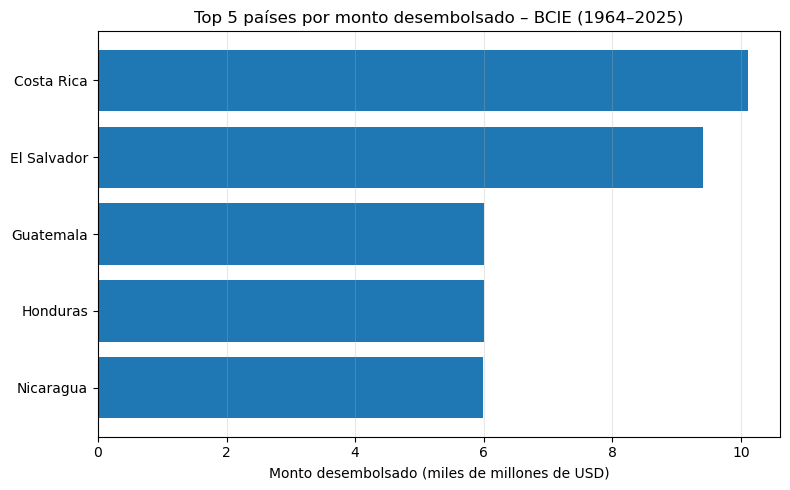

In [51]:
plt.figure(figsize=(8,5))

plt.barh(
    top_5_desem["PAIS"],
    top_5_desem["MONTO_BILLONES_USD"]
)

plt.xlabel("Monto desembolsado (miles de millones de USD)")
plt.title("Top 5 países por monto desembolsado – BCIE (1964–2025)")
plt.gca().invert_yaxis()  # país con mayor monto arriba
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()

plt.savefig(
    "Graficos/05_top_5_paises_desembolsados.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

In [55]:
sector_aprob = pd.DataFrame(df_aprobaciones.groupby('SECTOR_INSTITUCIONAL').sum('MONTO_BRUTO_USD')['MONTO_BRUTO_USD'])

In [58]:
sector_aprob = sector_aprob.reset_index()

In [61]:
sector_aprob['MONTO_BILLONES_USD'] = sector_aprob['MONTO_BRUTO_USD'] / 1e9

In [63]:
sector_aprob.drop(columns=['MONTO_BRUTO_USD'],inplace=True)

In [68]:
sector_aprob = sector_aprob.sort_values('MONTO_BILLONES_USD',ascending=False)
sector_aprob

,SECTOR_INSTITUCIONAL,MONTO_BILLONES_USD
1,Sector Público,47.781911
0,Sector Privado,9.384119


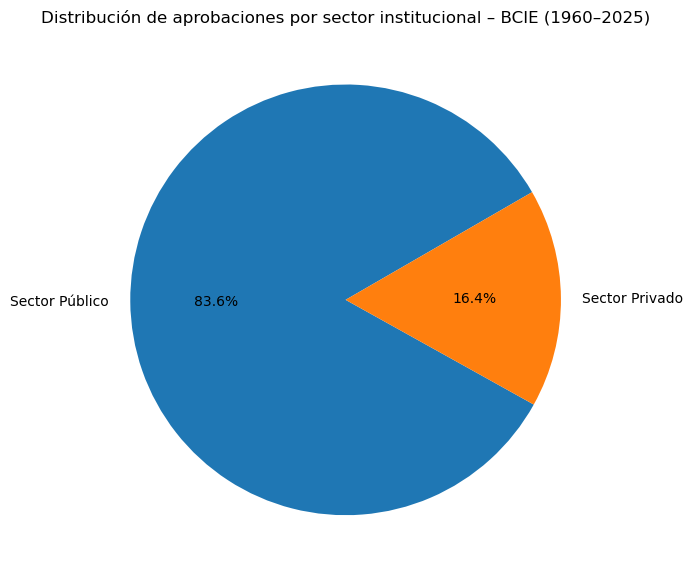

In [78]:
plt.figure(figsize=(7,7))

plt.pie(
    sector_aprob['MONTO_BILLONES_USD'],
    labels=sector_aprob['SECTOR_INSTITUCIONAL'],
    autopct='%1.1f%%',
    startangle=30
)

plt.title('Distribución de aprobaciones por sector institucional – BCIE (1960–2025)')

plt.tight_layout()

plt.savefig(
    "Graficos/06_sector_aprobaciones_pie.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

In [80]:
df_desembolsos.head()

,PAIS,ANIO_DESEMBOLSO,SECTOR_INSTITUCIONAL,MONTO_BRUTO_USD,DECADA,TIPO
0,Costa Rica,1965,Sector Público,1994591.79,1960,Desembolso
1,El Salvador,1967,Sector Público,4695698.73,1960,Desembolso
2,Honduras,1964,Sector Público,1262295.16,1960,Desembolso
3,Guatemala,1964,Sector Público,2250000.00,1960,Desembolso
4,Cuba,2024,Sector Público,28794236.23,2020,Desembolso


In [81]:
sector_desem = pd.DataFrame(df_desembolsos.groupby('SECTOR_INSTITUCIONAL').sum('MONTO_BRUTO_USD')['MONTO_BRUTO_USD'])

In [82]:
sector_desem = sector_desem.reset_index()

In [83]:
sector_desem['MONTO_BILLONES_USD'] = sector_desem['MONTO_BRUTO_USD'] / 1e9
sector_desem.drop(columns=['MONTO_BRUTO_USD'],inplace=True)

In [85]:
sector_desem = sector_desem.sort_values('MONTO_BILLONES_USD',ascending=False)
sector_desem

,SECTOR_INSTITUCIONAL,MONTO_BILLONES_USD
1,Sector Público,29.107059
0,Sector Privado,14.074921


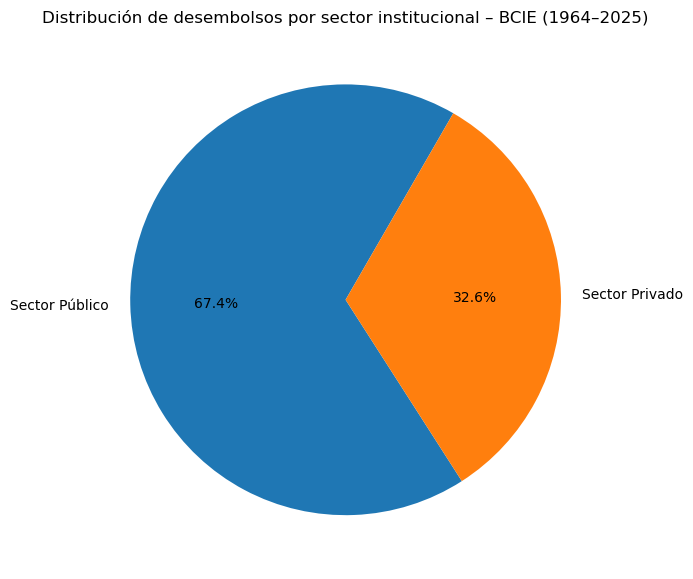

In [96]:
plt.figure(figsize=(7,7))

plt.pie(
    sector_desem['MONTO_BILLONES_USD'],
    labels=sector_desem['SECTOR_INSTITUCIONAL'],
    autopct='%1.1f%%',
    startangle=60
)

plt.title('Distribución de desembolsos por sector institucional – BCIE (1964–2025)')

plt.tight_layout()

plt.savefig(
    "Graficos/07_sector_desembolsos_pie.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()